In [1]:
#Import all libraries here
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from IPython.display import Image

In [2]:
#Extract the dataset from the zip_file
zf = zipfile.ZipFile('creditcard.zip') 
data_set = pd.read_csv(zf.open('creditcard.csv'))

In [3]:
print(data_set)
print(data_set.shape)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [4]:
#First 5 rows of data_set
data_set.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#The dataset comprises of 284807 transactions, with the features V1, V2, V3, V4, ..., V28 that are obtained using PCA(Principal Component Analysis).
#Time column is the feature that indicates the duration between every transaction occuring and the first transaction.
#Amount column is the feature that contains the transacted amount.
#Class contains either 0 or 1, where 1 is referred to fraud and 0 for no fraud.

In [6]:
#Understand the mean, count, standard_deviation and median(25th, 50th, 75th percentile of dataset)
data_set.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
#Now we need to find the number of fraud transactions and number of genuine transactions

In [8]:
genuine = data_set[data_set["Class"] == 0]
fraud = data_set[data_set["Class"] == 1]

In [9]:
print("Number of Genuine transactions = ",genuine.Class.value_counts()[0])
print("Number of fraudulent transactions = ",fraud.Class.value_counts()[1])

Number of Genuine transactions =  284315
Number of fraudulent transactions =  492


In [10]:
# Lets see a sns plot between fraud and genuine transactions

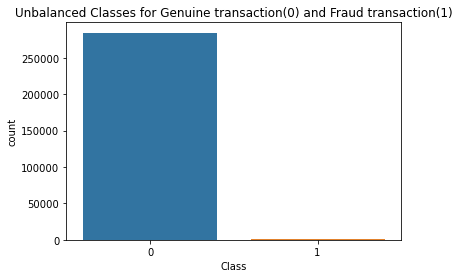

In [11]:
sns.countplot(x = "Class", data = data_set)
plt.title("Unbalanced Classes for Genuine transaction(0) and Fraud transaction(1)")
plt.savefig("Before UnderSampling")
plt.show()

In [12]:
#Very huge difference between number of genuine and fraudulent transactions in respect to the classes as seen from the count and sns countplot.
#That means dataset is very much imbalanced, but what is imbalanced dataset?
#Imbalanced Dataset = Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.

In [13]:
# Lets see a plot for features Amount and Time

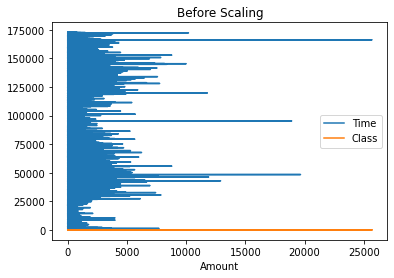

In [14]:
data_set.plot(x="Amount", y=["Time", "Class"])
plt.title("Before Scaling")
plt.savefig("Before Scaling")
plt.show()

In [15]:
#From the above plot we could see that features Amount and Time are not scaled

In [16]:
# Lets use the heatmap to find any correlations for the features.
#Correlation is a table that shows the relation 2 features. It helps to understand data more deeply. 
#With colors and heatmap chart it helps you to visualize and spot difference very efficiently.

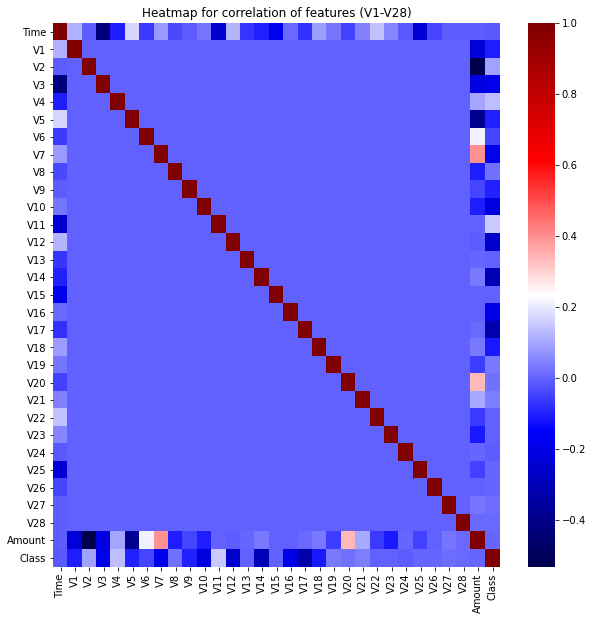

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(data_set.corr(), cmap="seismic")
plt.title("Heatmap for correlation of features (V1-V28)")
plt.savefig("HeatMap for correlations of features (V1-V28)")
plt.show()

In [18]:
# From this heat map, we can see the highest correlations are observed between Time & V3[<-0.4], Amount & V2[<-0.4], Amount & V4[0.19]
# Also from this heat map, features V1-V28 somehow have close inter-connection with each other.
# But class feature has some positive and negative correlation with all V-features, whereas it doesnot have any correlation with
# the Feature Time and Amount.

In [19]:
# From the above correlation, it clearly indicates that all V-features scaled, but [Time and Amount] isn't scaled.
# So scaling them is first priority.
# Then once its scaled, they have to be dropped from the dataset.
# Then we can move forward for either oversampling/undersampling.

In [20]:
# We are using MinMax scaler to scale the two features Amount and Time based on the minimum and maximum value.
# From the above plot we clearly saw the amount ranges between [0-25000], whereas Time ranges between [0-175000]
# To undermine this data, we thought of a way to eliminate the median values, instead consider the minimum and maximum values of the dataset.

In [21]:
minmax_scale = MinMaxScaler()

data_set['scaled_amount']=minmax_scale.fit_transform(data_set['Amount'].values.reshape(-1,1))
data_set['scaled_Time']=minmax_scale.fit_transform(data_set['Time'].values.reshape(-1,1))

data_set.drop(['Amount','Time'], axis=1,inplace=True)

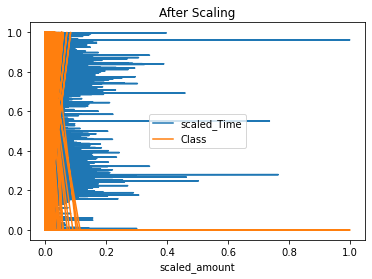

In [22]:
data_set.plot(x="scaled_amount", y=["scaled_Time", "Class"])
plt.title("After Scaling")
plt.savefig("After Scaling")
plt.show()

In [23]:
# So now, this looks good we have both the features [Time and Amount] in range between [0-1].

In [24]:
# Lets see the new heatmap to after scaling the features time and amount.

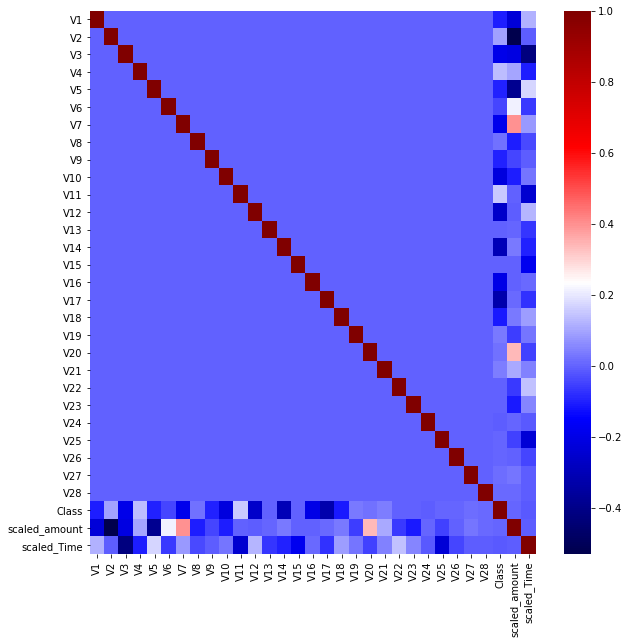

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(data_set.corr(), cmap="seismic")
plt.savefig("HeatMap for correlations after scaling[Time and Amount]")
plt.show()

In [26]:
# After scaling the Data lets move ahead with Handling the imbalanced data
# That means we can move ahead for Sampling techniques.
# But in our case, we have 492 fraud cases and 284315 genuine cases.
# In our opinion, undersampling would be much easier and feasible.
#Undersampling is a technique to balance uneven datasets by keeping all of the data in the minority class and decreasing the size of the majority class. 
#It is one of several techniques data scientists can use to extract more accurate information from originally imbalanced datasets.

In [27]:
# First, we will shuffle the whole dataset with random state=4
# Extract fraud ones onto a different dataset fraud_dataset
# In the fraud we have 492 observations.
# Now we have to select 492 random observations from 284315 genuine observations as non_fraud_dataset.
# Then concat both fraud_dataset and non_fraud_dataset into normalized one.

In [28]:
# Shuffle the Dataset.
shuffled_data_set = data_set.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
fraud_data_set = shuffled_data_set.loc[shuffled_data_set['Class'] == 1]

#Randomly select 492 observations from the genuine (majority class)
genuine_data_set = shuffled_data_set.loc[shuffled_data_set['Class'] == 0].sample(n=492,random_state=42)

# Concatenate both dataframes again
normalized_data_set = pd.concat([fraud_data_set, genuine_data_set])

In [29]:
# Lets see a sns plot between fraud and genuine transactions after scaling Time and amount

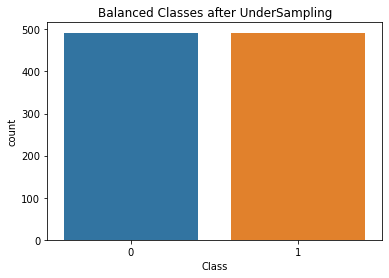

In [30]:
sns.countplot(x = "Class", data = normalized_data_set)
plt.title("Balanced Classes after UnderSampling")
plt.savefig("After UnderSampling")
plt.show()

In [31]:
normalized_data_set.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_Time
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,-2.409122,1.791198,-3.452995,2.283547,-1.533028,-0.699335,-2.761585,0.301212,-1.297470,-2.815196,...,-0.019253,-0.013035,-0.039323,0.010366,0.017174,0.057669,0.028632,0.500000,0.003952,0.514575
std,5.498477,3.704824,6.255260,3.210356,4.230693,1.749375,5.876351,4.892548,2.362394,4.604135,...,1.170940,1.180260,0.554042,0.706143,0.475554,1.252047,0.567446,0.500254,0.008368,0.274263
min,-30.552380,-13.536985,-31.103685,-4.702261,-22.105532,-8.280604,-43.557242,-41.044261,-13.434066,-24.588262,...,-8.887017,-19.254328,-2.028024,-4.781606,-2.068561,-22.565679,-11.710896,0.000000,0.000000,0.002350
25%,-2.837530,-0.127780,-5.084967,-0.081768,-1.689783,-1.551056,-3.060742,-0.169292,-2.313050,-4.572043,...,-0.555973,-0.245552,-0.371214,-0.317642,-0.297143,-0.063869,-0.055845,0.000000,0.000053,0.281665
50%,-0.797018,0.895209,-1.291304,1.384066,-0.443891,-0.639088,-0.627272,0.189876,-0.717872,-0.889173,...,-0.031972,-0.031591,0.013825,0.049727,-0.027332,0.052503,0.035099,0.500000,0.000645,0.478578
75%,0.963388,2.833075,0.443925,4.247831,0.537532,0.101747,0.288333,0.865726,0.155062,-0.008789,...,0.564606,0.202386,0.379331,0.394096,0.329931,0.429253,0.208837,1.000000,0.003892,0.776231
max,2.341711,22.057729,9.382558,12.114672,12.726904,6.474115,15.661716,20.007208,15.594995,23.745136,...,8.361985,5.967022,1.224639,2.742286,2.745261,3.052358,3.350929,1.000000,0.082747,0.998860


In [32]:
# Now that we have the dataset, lets start creating the target column Y and feature column X
# Class is considered as the target

In [33]:
X = normalized_data_set.drop(columns='Class', axis=1)
y = normalized_data_set['Class']

In [34]:
print("X=",X)
print("Y=",y)

X=               V1        V2         V3         V4        V5        V6  \
9179   -2.880042  5.225442 -11.063330   6.689951 -5.759924 -2.244031   
223618 -2.006582  3.676577  -5.463811   7.232058 -1.627859 -0.996755   
9487   -4.153014  8.204797 -15.031714  10.330100 -3.994426 -3.250013   
10497   1.189784  0.942289   0.082334   3.024050  0.412406 -0.214415   
250761 -0.512349  4.827060  -7.973939   7.334059  0.367704 -2.055129   
...          ...       ...        ...        ...       ...       ...   
30792  -1.280608  1.602133   0.705905   1.093425 -0.237750  0.945421   
254619 -0.479100 -0.077534   0.404028  -0.666043  1.264096 -0.829802   
154095  1.908030 -0.457748   0.333732   0.470267 -0.960866 -0.099910   
136926  1.281151  0.132456   0.212079   0.133399 -0.476419 -1.306907   
172969 -1.452337 -0.466853  -0.555007  -3.355574  2.117199  3.431942   

               V7        V8        V9        V10  ...       V21       V22  \
9179   -11.199975  4.014722 -3.429304 -11.561950  ...  

In [35]:
# Split the data for X_train,X_test,y_train,y_test with test_size and random state
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [36]:
# Convert all the above generated to array for input to algorithms for easy task.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [37]:
# Let's start with the models and algorithms.

In [38]:
# 1. KNeighborsClassifier with k as an input to the classifier.
k = 3
knn_algorithm = KNeighborsClassifier(n_neighbors=k)
knn_algorithm.fit(X_train, y_train)
y_predict_knn = knn_algorithm.predict(X_test)
y_predict_probab_knn = knn_algorithm.predict_proba(X_test)
knn_accuracy = accuracy_score(y_test, y_predict_knn)
print("Accuracy score for KNN=",knn_accuracy*100)
pre_knn = precision_score(y_test,y_predict_knn)
print("Precision score for KNN=",pre_knn*100)
recall_knn = recall_score(y_test,y_predict_knn)
print("Recall score for KNN=",recall_knn*100)
f1_knn = f1_score(y_test,y_predict_knn)
print("F1 score for KNN=",f1_knn*100)


Accuracy score for KNN= 93.58108108108108
Precision score for KNN= 95.8041958041958
Recall score for KNN= 91.33333333333333
F1 score for KNN= 93.51535836177473


In [39]:
# 2. Decision Tree Classifier
decisiontree_algorithm = DecisionTreeClassifier()
decisiontree_algorithm.fit(X_train, y_train)
y_predict_dt = decisiontree_algorithm.predict(X_test)
y_predict_probab_dt = decisiontree_algorithm.predict_proba(X_test)
dt_accuracy = accuracy_score(y_test, y_predict_dt)
print("Accuracy score for Decision Tree=",dt_accuracy*100)
pre_dt = precision_score(y_test,y_predict_dt)
print("Precision score for Decision Tree =",pre_dt*100)
recall_dt = recall_score(y_test,y_predict_dt)
print("Recall score for Decision Tree =",recall_dt*100)
f1_dt = f1_score(y_test,y_predict_dt)
print("F1 score for Decision Tree=",f1_dt*100)


Accuracy score for Decision Tree= 90.87837837837837
Precision score for Decision Tree = 88.67924528301887
Recall score for Decision Tree = 94.0
F1 score for Decision Tree= 91.2621359223301


In [40]:
# 3. Random Forest Classifier
# Here we will use the random state that's already used while splitting the dataset
randomForest_algorithm = RandomForestClassifier(n_estimators=19, bootstrap = True, random_state=42)
randomForest_algorithm.fit(X_train, y_train)
y_predict_rf = randomForest_algorithm.predict(X_test)
y_predict_probab_rf = randomForest_algorithm.predict_proba(X_test)
rf_accuracy = accuracy_score(y_test,y_predict_rf)
print("Accuracy score for Random Forest Classifier=",rf_accuracy*100)
pre_rf = precision_score(y_test,y_predict_rf)
print("Precision score for Random Forest=",pre_rf*100)
recall_rf = recall_score(y_test,y_predict_rf)
print("Recall score for Random Forest=",recall_rf*100)
f1_rf = f1_score(y_test,y_predict_rf)
print("F1 score for Random Forest=",f1_rf*100)

Accuracy score for Random Forest Classifier= 93.24324324324324
Precision score for Random Forest= 93.91891891891892
Recall score for Random Forest= 92.66666666666666
F1 score for Random Forest= 93.28859060402685


In [41]:
# 4. Logistic Regression
logreg_algorithm = LogisticRegression(solver='liblinear')
logreg_algorithm.fit(X_train, y_train)
y_predict_lr = logreg_algorithm.predict(X_test)
y_predict_probab_lr = logreg_algorithm.predict_proba(X_test)
lr_accuracy = accuracy_score(y_test, y_predict_lr)
print("Accuracy score for Logistic Regression=",lr_accuracy*100)
pre_lr = precision_score(y_test,y_predict_lr)
print("Precision score for Logistic Regression=",pre_lr*100)
recall_lr = recall_score(y_test,y_predict_lr)
print("Recall score for Logistic Regression=",recall_lr*100)
f1_lr = f1_score(y_test,y_predict_lr)
print("F1 score for Logistic Regression =",f1_lr*100)

Accuracy score for Logistic Regression= 94.5945945945946
Precision score for Logistic Regression= 96.52777777777779
Recall score for Logistic Regression= 92.66666666666666
F1 score for Logistic Regression = 94.5578231292517


In [42]:
# 5. Artificial Neural Network
# 1 Hidden Layer with 200 neurons:
ANN_Algorithm = MLPClassifier(hidden_layer_sizes=(200), activation= 'logistic', 
                       solver='sgd', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.1, max_iter=10000, verbose=True, tol=0.0001)
#ANN_Algorithm = MLPClassifier(hidden_layer_sizes=(50), activation= 'logistic', 
#                       solver='adam', alpha=1e-5, random_state=1, 
#                       learning_rate_init = 0.1, verbose=True, tol=0.0001)
ANN_Algorithm.fit(X_train, y_train)
# Weights:
print(ANN_Algorithm.coefs_)
# The ith element in the list represents the weight matrix corresponding to layer i.
print('\n')
# Bias weights:
print(ANN_Algorithm.intercepts_)
# The ith element in the list represents the bias vector corresponding to layer i + 1.
# Testing on the testing set:
y_predict_ann = ANN_Algorithm.predict(X_test)
y_predict_probab_ann = ANN_Algorithm.predict_proba(X_test)
print(y_predict_ann)
ann_accuracy = accuracy_score(y_test, y_predict_ann)
print("Accuracy score for Artificial Neural Network=",ann_accuracy*100)
pre_ann = precision_score(y_test,y_predict_ann)
print("Precision score for Artificial Neural Network=",pre_ann*100)
recall_ann = recall_score(y_test,y_predict_ann)
print("Recall score for Artificial Neural Network=",recall_ann*100)
f1_ann = f1_score(y_test,y_predict_ann)
print("F1 score for Artificial Neural Network=",f1_ann*100)

Iteration 1, loss = 0.57076353
Iteration 2, loss = 0.29126325
Iteration 3, loss = 0.22226693
Iteration 4, loss = 0.19017737
Iteration 5, loss = 0.17898790
Iteration 6, loss = 0.16431734
Iteration 7, loss = 0.15913733
Iteration 8, loss = 0.15668152
Iteration 9, loss = 0.15039141
Iteration 10, loss = 0.14799894
Iteration 11, loss = 0.14563997
Iteration 12, loss = 0.14378386
Iteration 13, loss = 0.14180928
Iteration 14, loss = 0.13984059
Iteration 15, loss = 0.13794687
Iteration 16, loss = 0.13725746
Iteration 17, loss = 0.13495703
Iteration 18, loss = 0.13409622
Iteration 19, loss = 0.13434306
Iteration 20, loss = 0.13338629
Iteration 21, loss = 0.13117178
Iteration 22, loss = 0.13150843
Iteration 23, loss = 0.13115421
Iteration 24, loss = 0.12923753
Iteration 25, loss = 0.12882229
Iteration 26, loss = 0.12840435
Iteration 27, loss = 0.12729454
Iteration 28, loss = 0.12870838
Iteration 29, loss = 0.12663421
Iteration 30, loss = 0.12639861
Iteration 31, loss = 0.12751266
Iteration 32, los

       [-9.51840194e-02]])]


[array([ 0.04659382,  0.07098125,  0.07851345, -0.02474092,  0.01569556,
        0.0125054 ,  0.0573595 , -0.07662128,  0.02298148, -0.02632224,
        0.06744931,  0.0340634 , -0.04742937, -0.07491027,  0.00244668,
        0.08647392, -0.03361101,  0.08720542, -0.009231  , -0.05964625,
       -0.08947294, -0.0341518 , -0.08696533,  0.01231239,  0.02311202,
        0.0311772 , -0.0277838 , -0.06163663,  0.00561674, -0.09086553,
        0.02284946,  0.06366183, -0.08203722, -0.02220139,  0.01660761,
        0.02352744, -0.06406013,  0.01960671,  0.012141  ,  0.06882492,
       -0.001867  , -0.02454509, -0.058115  ,  0.02269268, -0.04972026,
       -0.07351665,  0.05029778, -0.02119792, -0.01428516,  0.06941995,
       -0.0762892 ,  0.08195585,  0.00303368,  0.01553283,  0.04146254,
        0.08364228, -0.0041113 ,  0.03515285,  0.02935277,  0.01518095,
        0.05462622, -0.03644013, -0.00662797, -0.07711567,  0.07226911,
        0.00946751,  0.00117033, 

In [43]:
# 6. Naive Bayes
naiveBayes_algorithm = GaussianNB()
naiveBayes_algorithm.fit(X_train, y_train)
y_predict_naiveBayes  =  naiveBayes_algorithm.predict(X_test)
y_predict_probab_naiveBayes = naiveBayes_algorithm.predict_proba(X_test)
naiveBayes_accuracy = accuracy_score(y_test, y_predict_naiveBayes)
print("Accuracy score for Naive Bayes model = ", naiveBayes_accuracy*100)
pre_nb = precision_score(y_test,y_predict_naiveBayes)
print("Precision score for Naive Bayes=",pre_nb*100)
recall_nb = recall_score(y_test,y_predict_naiveBayes)
print("Recall score for Naive Bayes=",pre_nb*100)
f1_nb = f1_score(y_test,y_predict_naiveBayes)
print("F1 score for Naive Bayes=",f1_nb*100)

Accuracy score for Naive Bayes model =  91.21621621621621
Precision score for Naive Bayes= 97.6923076923077
Recall score for Naive Bayes= 97.6923076923077
F1 score for Naive Bayes= 90.71428571428571


In [44]:
#7. Support Vector Machine Classifier
svm_algorithm = SVC(kernel='rbf', probability=True, random_state = 1)
svm_algorithm.fit(X_train, y_train)
y_predict_svm = svm_algorithm.predict(X_test)
y_predict_probab_svm = svm_algorithm.predict_proba(X_test)
svm_accuracy = accuracy_score(y_test, y_predict_svm)
print("Accuracy score for Support Vector Machine = ", svm_accuracy*100)
pre_svm = precision_score(y_test,y_predict_svm)
print("Precision score for Support Vector Machine=",pre_svm*100)
recall_svm = recall_score(y_test,y_predict_svm)
print("Recall score for Support Vector Machine=",recall_svm*100)
f1_svm = recall_score(y_test,y_predict_svm)
print("F1 score for Naive Bayes=",f1_svm*100)


Accuracy score for Support Vector Machine =  94.25675675675676
Precision score for Support Vector Machine= 97.84172661870504
Recall score for Support Vector Machine= 90.66666666666666
F1 score for Naive Bayes= 90.66666666666666


In [45]:
# ROC Curve for all 7 - models
# For KNN
fpr1, tpr1, thresh1 = roc_curve(y_test, y_predict_probab_knn[:,1], pos_label=1)
# For Decision Tree
fpr2, tpr2, thresh2 = roc_curve(y_test, y_predict_probab_dt[:,1], pos_label=1)
# For Random Forest
fpr3, tpr3, thresh3 = roc_curve(y_test, y_predict_probab_rf[:,1], pos_label=1)
# For Logistic Regression
fpr4, tpr4, thresh4 = roc_curve(y_test, y_predict_probab_lr[:,1], pos_label=1)
# For Artificial Neural Network
fpr5, tpr5, thresh5 = roc_curve(y_test, y_predict_probab_ann[:,1], pos_label=1)
# For Naive Bayes
fpr6, tpr6, thresh6 = roc_curve(y_test, y_predict_probab_naiveBayes[:,1], pos_label=1)
# For Support Vector Machine
fpr7, tpr7, thresh7 = roc_curve(y_test, y_predict_probab_svm[:,1], pos_label=1)

In [46]:
# AUC for all 7 - models

# For KNN
AUC_KNN = metrics.auc(fpr1, tpr1)
# For Decision Tree
AUC_dt = metrics.auc(fpr2, tpr2)
# For Random Forest
AUC_rf = metrics.auc(fpr3, tpr3)
# For Logistic Regression
AUC_lr = metrics.auc(fpr4, tpr4)
# For Artificial Neural Network
AUC_ann = metrics.auc(fpr5, tpr5)
# For Naive Bayes
AUC_nb = metrics.auc(fpr6, tpr6)
# For Support Vector Machine
AUC_svm = metrics.auc(fpr7, tpr7)

print("AUC KNN: " + str(AUC_KNN))
print("AUC Decision Tree: " + str(AUC_dt))
print("AUC Random Forest: " + str(AUC_rf))
print("AUC Logistic Regression: " + str(AUC_lr))
print("AUC Artificial Neural Network: " + str(AUC_ann))
print("AUC Naive Bayes: " + str(AUC_nb))
print("AUC Support Vector Machine: " + str(AUC_svm))

AUC KNN: 0.9612328767123288
AUC Decision Tree: 0.9083561643835616
AUC Random Forest: 0.9797260273972603
AUC Logistic Regression: 0.9780365296803653
AUC Artificial Neural Network: 0.9787214611872146
AUC Naive Bayes: 0.9558219178082191
AUC Support Vector Machine: 0.9767123287671232


In [47]:
# Plot ROC Curve with AUC

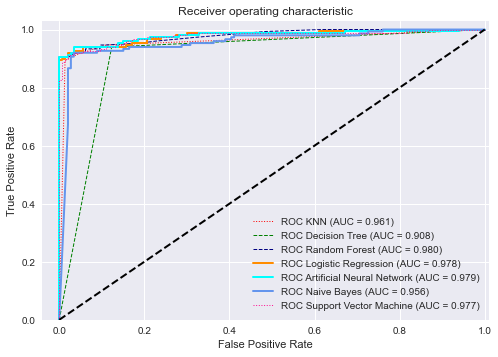

In [48]:
%matplotlib inline
plt.style.use('seaborn')
plt.figure(1)
# Curve for KNN
plt.plot(fpr1, tpr1, color='red', lw=1, linestyle=':', label='ROC KNN (AUC = %0.3f)' % AUC_KNN)
# Curve for Decision Tree
plt.plot(fpr2, tpr2, color='green', lw=1, linestyle='--', label='ROC Decision Tree (AUC = %0.3f)' % AUC_dt)
# Curve for Random Forest
plt.plot(fpr3, tpr3, color='navy', lw=1, linestyle='--', label='ROC Random Forest (AUC = %0.3f)' % AUC_rf)
# Curve for Logistic Regression
plt.plot(fpr4, tpr4, color='darkorange', lw=2, label='ROC Logistic Regression (AUC = %0.3f)' % AUC_lr)
# Curve for Artificial Neural Network
plt.plot(fpr5, tpr5, color='aqua', lw=2, label='ROC Artificial Neural Network (AUC = %0.3f)' % AUC_ann)
# Curve for Naive Bayes
plt.plot(fpr6, tpr6, color='cornflowerblue', lw=2, label='ROC Naive Bayes (AUC = %0.3f)' % AUC_nb)
# Curve for Support Vector Machine
plt.plot(fpr7, tpr7, color='deeppink', lw=1, linestyle=':',  label='ROC Support Vector Machine (AUC = %0.3f)' % AUC_svm)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.04, 1.009])
plt.ylim([0.0, 1.03])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC',dpi=100)
plt.show()

In [49]:
### ROC Zoomed Plot ###

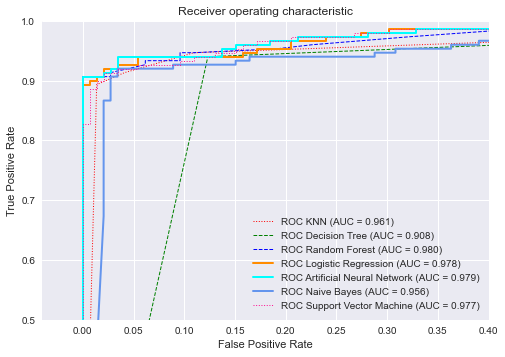

In [50]:
%matplotlib inline
plt.style.use('seaborn')
plt.figure()
# Curve for KNN
plt.plot(fpr1, tpr1, color='red', lw=1, linestyle=':', label='ROC KNN (AUC = %0.3f)' % AUC_KNN)
# Curve for Decision Tree
plt.plot(fpr2, tpr2, color='green', lw=1, linestyle='--', label='ROC Decision Tree (AUC = %0.3f)' % AUC_dt)
# Curve for Random Forest
plt.plot(fpr3, tpr3, color='blue', lw=1, linestyle='--', label='ROC Random Forest (AUC = %0.3f)' % AUC_rf)
# Curve for Logistic Regression
plt.plot(fpr4, tpr4, color='darkorange', lw=2, label='ROC Logistic Regression (AUC = %0.3f)' % AUC_lr)
# Curve for Artificial Neural Network
plt.plot(fpr5, tpr5, color='aqua', lw=2, label='ROC Artificial Neural Network (AUC = %0.3f)' % AUC_ann)
# Curve for Naive Bayes
plt.plot(fpr6, tpr6, color='cornflowerblue', lw=2, label='ROC Naive Bayes (AUC = %0.3f)' % AUC_nb)
# Curve for Support Vector Machine
plt.plot(fpr7, tpr7, color='deeppink', lw=1, linestyle=':',  label='ROC Support Vector Machine (AUC = %0.3f)' % AUC_svm)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.04, 0.4])
plt.ylim([0.5, 1])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROCzoom',dpi=100)
plt.show()

In [51]:
# Finding confusion matrix and plotting for all 7-algorithms in 2-subplots

In [52]:
# 1st subplot containing KNN, DecisionTree, RandomForest, LogisticRegression #

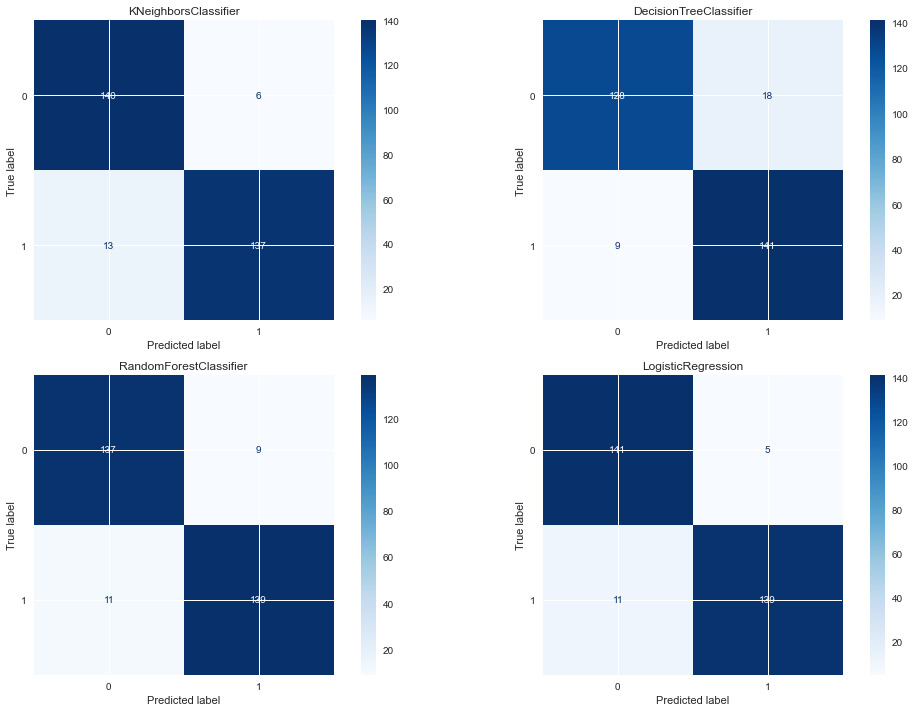

In [53]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
classifiers = [knn_algorithm, decisiontree_algorithm,randomForest_algorithm,logreg_algorithm]
for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, X_test, y_test, ax=ax, cmap='Blues')
    ax.title.set_text(type(cls).__name__)

plt.savefig('Confusion Matrix for first 4-algorithms',dpi=100)
plt.tight_layout()  
plt.show()

In [54]:
# 2nd subplot containing ANN_Algorithm, naiveBayes_algorithm, svm_algorithm #

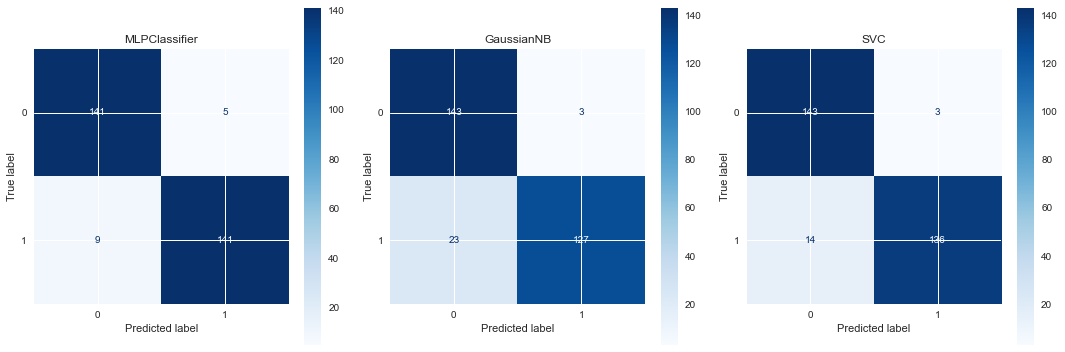

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
classifiers = [ANN_Algorithm, naiveBayes_algorithm, svm_algorithm]
for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, X_test, y_test, ax=ax, cmap='Blues')
    ax.title.set_text(type(cls).__name__)

plt.savefig('Confusion Matrix for last 3-algorithms',dpi=100)
plt.tight_layout()  
plt.show()

In [56]:
print("Accuracy score for KNN=",knn_accuracy*100)
print("Accuracy score for Decision Tree=",dt_accuracy*100)
print("Accuracy score for Random Forest Classifier=",rf_accuracy*100)
print("Accuracy score for Logistic Regression=",lr_accuracy*100)
print("Accuracy score for Artificial Neural Network=",ann_accuracy*100)
print("Accuracy score for Naive Bayes model = ", naiveBayes_accuracy*100)
print("Accuracy score for Support Vector Machine = ", svm_accuracy*100)

Accuracy score for KNN= 93.58108108108108
Accuracy score for Decision Tree= 90.87837837837837
Accuracy score for Random Forest Classifier= 93.24324324324324
Accuracy score for Logistic Regression= 94.5945945945946
Accuracy score for Artificial Neural Network= 95.27027027027027
Accuracy score for Naive Bayes model =  91.21621621621621
Accuracy score for Support Vector Machine =  94.25675675675676


In [57]:
print("Precision score for KNN=",pre_knn*100)
print("Precision score for Decision Tree =",pre_dt*100)
print("Precision score for Random Forest=",pre_rf*100)
print("Precision score for Logistic Regression=",pre_lr*100)
print("Precision score for Artificial Neural Network=",pre_ann*100)
print("Precision score for Naive Bayes=",pre_nb*100)
print("Precision score for Support Vector Machine=",pre_svm*100)

Precision score for KNN= 95.8041958041958
Precision score for Decision Tree = 88.67924528301887
Precision score for Random Forest= 93.91891891891892
Precision score for Logistic Regression= 96.52777777777779
Precision score for Artificial Neural Network= 96.57534246575342
Precision score for Naive Bayes= 97.6923076923077
Precision score for Support Vector Machine= 97.84172661870504


In [58]:
print("Recall score for KNN=",recall_knn*100)
print("Recall score for Decision Tree =",recall_dt*100)
print("Recall score for Random Forest=",recall_rf*100)
print("Recall score for Logistic Regression=",recall_lr*100)
print("Recall score for Artificial Neural Network=",recall_ann*100)
print("Recall score for Naive Bayes=",recall_nb*100)
print("Recall score for Support Vector Machine=",recall_svm*100)

Recall score for KNN= 91.33333333333333
Recall score for Decision Tree = 94.0
Recall score for Random Forest= 92.66666666666666
Recall score for Logistic Regression= 92.66666666666666
Recall score for Artificial Neural Network= 94.0
Recall score for Naive Bayes= 84.66666666666667
Recall score for Support Vector Machine= 90.66666666666666


In [59]:
print("F1 score for KNN=",f1_knn*100)
print("F1 score for Decision Tree =",f1_dt*100)
print("F1 score for Random Forest=",f1_rf*100)
print("F1 score for Logistic Regression=",f1_lr*100)
print("F1 score for Artificial Neural Network=",f1_ann*100)
print("F1 score for Naive Bayes=",f1_nb*100)
print("F1 score for Support Vector Machine=",f1_svm*100)

F1 score for KNN= 93.51535836177473
F1 score for Decision Tree = 91.2621359223301
F1 score for Random Forest= 93.28859060402685
F1 score for Logistic Regression= 94.5578231292517
F1 score for Artificial Neural Network= 95.27027027027025
F1 score for Naive Bayes= 90.71428571428571
F1 score for Support Vector Machine= 90.66666666666666


In [71]:
Image(url="Results_from_project.png", width=800, height=1000)

In [70]:
# From this project we observed that with 284315 genuine cases, we have 492 fraudulent transactions. So anytime we get a database
# we shouldn't solely rely on database being optimized and scaled. This project made us understand the concepts behind handling 
# the database that involves normalizing, scaling the features amount and time with respect to class column and lastly under - 
# sampling the database by randomly choosing 492 genuine transactions among 284315 genuine ones, to pair up with fraud numbers.

# From CS-4661. we had learnt how to split the dataset based on target and features using random state and test-size.

# Then we started applying the algorithms in-order to find the accuracy levels.
# We have applied 7-algorithms, but in terms of accuracy we think the best was achieved via Artificial Neural Network as 95.27%

# We calculated Area Under Curve (AUC), then did plot the ROC for all 7-algorithms.
# In terms of ROC, we achieved the best in Random Forest as 98% as shown in diagram.

# We have also calculated Precision for all 7-algorithms, the best result was observed in Support Vector Machine as 97.80%.

# We have also caluclated F1-score and Recall for all 7-algorithms, the best result was observed in Artifical Neural Network 
# as 95.27% and 94% respectively.

# We have also tried to visualize the precictive analytics like using the confusion matrix since that gives direct comparisons
# about values of True Positives, False Positives, True Negatives and False Negatives and we also did a plot of confusion matrix.

# Now we have 7-algorithms, but we need to choose one among the 7 that gives the best accuracy, precision, recall, ROC and F1-score.
# From the histogram above we observed that the best result was observed with ANN(Artificial Neural Network), with an accuracy of
# 95.27%, precision of 96.57%, recall of 94%, ROC of 97.87% and F1-score of 95.27%.

# So with this we conclude that for credit card fraud detection algorithm, the best suitable algorithm is ANN(Artificial Neural Network).